## AutoEncode 노이즈 제거
---
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리

In [5]:
x_train=x_train.reshape(-1, 28*28)/255.0

In [6]:
x_train[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
x_test=x_test.reshape(-1, 28*28)/255.0

In [8]:
x_test[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [10]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 픽셀 범위 0.0~1.0 벗어나는 픽셀값 조정 np.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)

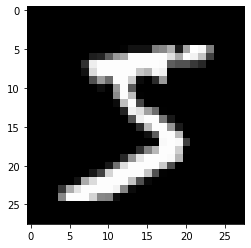

In [11]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

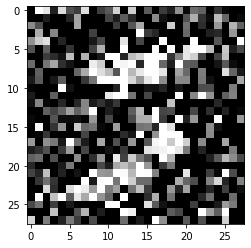

In [12]:
plt.imshow(x_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

## [3] 모델 구성 및 생성

In [13]:
# W, b 초기값 고정
set_random_seed(11)

In [14]:
def createAEModel(n_node):
    model=Sequential()
    # 입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    # 은닉
    model.add(Dense(units=n_node, activation='relu'))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [15]:
oneModel=createAEModel(1)
tenModel=createAEModel(10)
thirtyModel=createAEModel(30)
fiftyModel=createAEModel(50)

In [16]:
oneModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 784)               1568      
                                                                 
Total params: 2,355
Trainable params: 2,355
Non-trainable params: 0
_________________________________________________________________


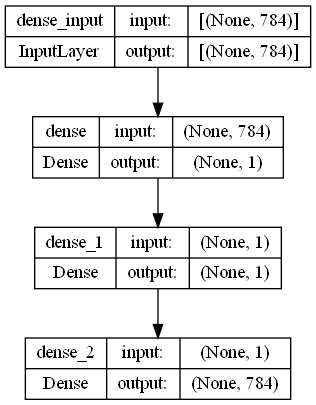

In [17]:
plot_model(oneModel, show_shapes=True)

## [4] 모델 학습

In [18]:
oneModel.fit(x_train_noised, x_train, epochs=10, verbose=0)
tenModel.fit(x_train_noised, x_train, epochs=10, verbose=0)
thirtyModel.fit(x_train_noised, x_train, epochs=10, verbose=0)
fiftyModel.fit(x_train_noised, x_train, epochs=10, verbose=0)

In [19]:
x_train_noised.shape

(60000, 784)

In [20]:
oneModel.evaluate(x_test, x_test)
tenModel.evaluate(x_test, x_test)
thirtyModel.evaluate(x_test, x_test)
fiftyModel.evaluate(x_test, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0219


0.02194824628531933

## [5] 예측
---
- 새로운 데이터 사용

In [21]:
pre_out1=oneModel.predict(x_test_noised[0].reshape(-1,784))
pre_out10=tenModel.predict(x_test_noised[0].reshape(-1,784))
pre_out30=thirtyModel.predict(x_test_noised[0].reshape(-1,784))
pre_out50=fiftyModel.predict(x_test_noised[0].reshape(-1,784))

1/1 [==============================] - 0s 127ms/step


In [28]:
pre_out1[0].shape, x_test[0].shape


((784,), (784,))

### 원본 이미지 - AE 진행된 이미지 비교

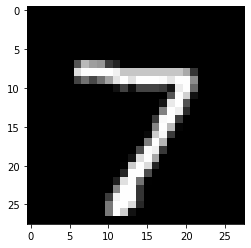

In [23]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

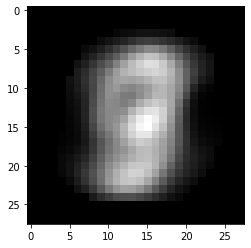

In [24]:
plt.imshow(pre_out1[0].reshape(28,28), cmap='gray')
plt.show()

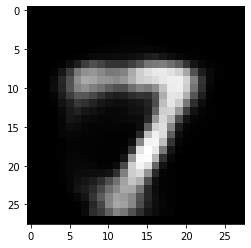

In [25]:
plt.imshow(pre_out10[0].reshape(28,28), cmap='gray')
plt.show()

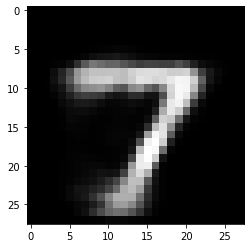

In [26]:
plt.imshow(pre_out30[0].reshape(28,28), cmap='gray')
plt.show()

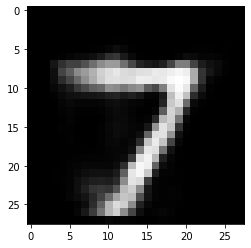

In [27]:
plt.imshow(pre_out50[0].reshape(28,28), cmap='gray')
plt.show()